In [2]:
#dependencies
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import random
from api_key import api_key
from citipy import citipy
from ratelimiter import RateLimiter
from datetime import datetime

In [3]:
#Generate random lat/lon coordinates
counter = 0
rndlat=[]
rndlon=[]

while len(rndlat) < 750:
    lat = np.random.uniform(-90, 90)
    lon = np.random.uniform(-180,180)
    rndlat.append(lat)
    rndlon.append(lon)
    counter += 1
 

geo_df = pd.DataFrame ({"lat": rndlat, "lon":rndlon})
geo_df.head()

,lat,lon
0,9.130543,97.003184
1,78.465508,-70.225576
2,50.510271,91.171709
3,-36.140707,-164.849625
4,72.108061,41.108039


In [4]:
#feed data to citipy
city = []
country = []


for index, row in geo_df.iterrows():
    city_lat=(row["lat"])
    city_lon=(row["lon"])
    city_name = citipy.nearest_city(city_lat, city_lon).city_name
    country_code = citipy.nearest_city(city_lat, city_lon).country_code
    city.append(city_name)
    country.append(country_code)
    
city_df= pd.DataFrame ({"city": city, "country": country})
city_df.drop_duplicates(["city", "country"])
city_df.head()

,city,country
0,phangnga,th
1,qaanaaq,gl
2,mugur-aksy,ru
3,avarua,ck
4,ostrovnoy,ru


In [5]:
weather_data=[]

In [6]:
#make API calls and collect data
base_url="http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={api_key}&units={units}&q="
rate_limiter = RateLimiter(max_calls=50, period=60)

for index, row in city_df.iterrows():
    with rate_limiter:
        city_q=row["city"]
        response = requests.get(query_url + city_q).json()
        record_counter=1
        try:
            temp=response["main"]["temp"]
            humid=response["main"]["humidity"]
            cloud=response["clouds"]["all"]
            wind=response["wind"]["speed"]
            city_lat=response["coord"]["lat"]
            city_name=response["name"]
            city_country=response["sys"]["country"]
            weather_data.append({"City": city_name, "Country": city_country, "Latitude": city_lat,
                                "Temperature (F)": temp, "Humidity (%)": humid, "Cloudiness (%)":cloud, "Wind Speed (MPH)": wind})
            print (f"Processing record #{record_counter} -- {city_q}")
            print (f'{base_url}appid=***masked***&units={units}&q={city_q}')
            print ("----------------------------------------------------------------")
            record_counter +=1
        except:
            print (f"Weather for {city_q} not found.")
            print ("----------------------------------------------------------------")
            continue

Processing record #1 -- phangnga
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=phangnga
----------------------------------------------------------------
Processing record #1 -- qaanaaq
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=qaanaaq
----------------------------------------------------------------
Processing record #1 -- mugur-aksy
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=mugur-aksy
----------------------------------------------------------------
Processing record #1 -- avarua
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=avarua
----------------------------------------------------------------
Processing record #1 -- ostrovnoy
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=ostrovnoy
----------------------------------------------------------------
Processing record #1 -- port blair
http://api.open

Processing record #1 -- mar del plata
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=mar del plata
----------------------------------------------------------------
Processing record #1 -- saint george
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=saint george
----------------------------------------------------------------
Processing record #1 -- arraial do cabo
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=arraial do cabo
----------------------------------------------------------------
Weather for andenes not found.
----------------------------------------------------------------
Processing record #1 -- ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=ushuaia
----------------------------------------------------------------
Processing record #1 -- cayenne
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q

Processing record #1 -- leua
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=leua
----------------------------------------------------------------
Processing record #1 -- saskylakh
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=saskylakh
----------------------------------------------------------------
Processing record #1 -- busselton
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=busselton
----------------------------------------------------------------
Processing record #1 -- mahebourg
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=mahebourg
----------------------------------------------------------------
Processing record #1 -- butaritari
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=butaritari
----------------------------------------------------------------
Processing record #1 -- punta arenas
http://api.

KeyboardInterrupt: 

In [7]:
print (len(weather_data))

94


In [8]:
weather_df=pd.DataFrame(weather_data)
weather_df=weather_df[["City", "Country","Latitude","Temperature (F)", "Humidity (%)", "Cloudiness (%)", "Wind Speed (MPH)"]]
weather_df.head()

,City,Country,Latitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (MPH)
0,Phangnga,TH,8.45,77.27,74,20,9.17
1,Qaanaaq,GL,77.48,4.15,73,94,4.52
2,Mugur-Aksy,RU,50.38,5.05,30,0,5.93
3,Avarua,CK,-21.21,80.60,74,9,5.82
4,Ostrovnoy,RU,68.05,16.02,96,98,6.87


In [9]:
weather_df.to_csv("weather_data.csv")

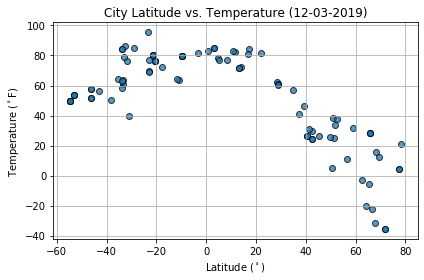

In [10]:
date = datetime.now()
date = date.strftime("%m-%d-%Y")

plt.scatter(weather_df["Latitude"], weather_df["Temperature (F)"], alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Temperature ({date})")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Temperature ($^\circ$F)")
plt.grid(True) 
plt.tight_layout()
plt.savefig("temp.png")
plt.show()

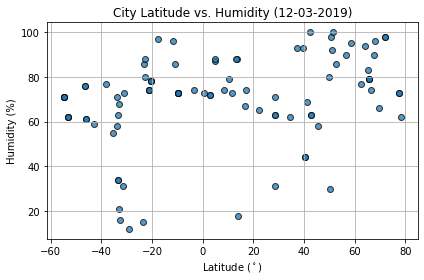

In [11]:
plt.scatter(weather_df["Latitude"], weather_df["Humidity (%)"], alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Humidity (%)")
plt.grid(True) 
plt.tight_layout()
plt.savefig("humidity.png")
plt.show()

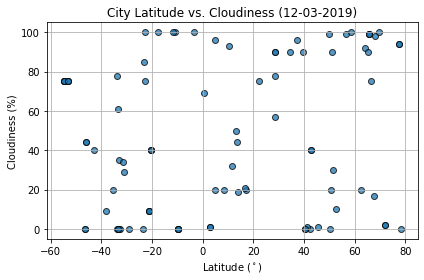

In [12]:
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness (%)"], alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Cloudiness (%)")
plt.grid(True) 
plt.tight_layout()
plt.savefig("clouds.png")
plt.show()

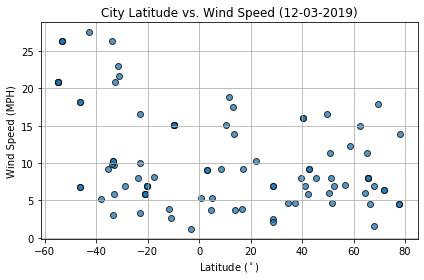

In [13]:
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed (MPH)"], alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Wind Speed (MPH)")
plt.grid(True) 
plt.tight_layout()
plt.savefig("wind.png")
plt.show()